In [1]:
import pandas as pd
import numpy as np
import json

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
top_richest = pd.read_csv('top_100_richest.csv', index_col='rank')
country_stats = pd.read_csv('wiki_number_of_billionaires.csv')
ages = top_richest[['name', 'age']]
gdps = pd.read_csv('gdp_csv.csv')

In [3]:
top_richest.head()

,name,net_worth,bday,age,nationality
rank,,,,,
1,Elon Musk,$240 Billion,28-Jun-71,51.0,South Africa
2,Jeff Bezos,$150 Billion,12-Jan-64,58.0,United States of America
3,Gautam Adani,$138 Billion,24-Jun-62,60.0,India
4,Bernard Arnault,$135 Billion,5-Mar-49,73.0,France
5,Bill Gates,$118 Billion,28-Oct-55,66.0,United States of America


In [4]:
country_stats.head()

,country,num_billionares,billionaire_per_million
0,World,"2,668",0.350
1,United States,735,1.853
2,Mainland China,539,0.276
3,India,166,0.101
4,Germany,134,1.553


In [5]:
age_counts = ages.value_counts('age').to_dict()
l = ages['age'].tolist()
min(l), max(l)

(36.0, 97.0)

In [6]:
ages = top_richest[['name', 'age']].iloc[:5]

In [7]:
ages

,name,age
rank,,
1,Elon Musk,51.0
2,Jeff Bezos,58.0
3,Gautam Adani,60.0
4,Bernard Arnault,73.0
5,Bill Gates,66.0


<BarContainer object of 5 artists>

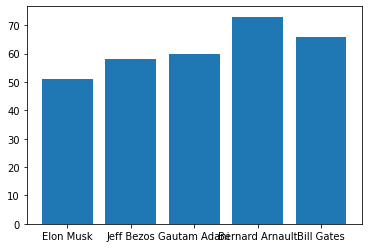

In [8]:
plt.bar(ages['name'], height=ages['age'])

In [9]:
def make_range(beg_num, num_ranges):
    bg = beg_num
    nr = num_ranges
    groupings = []
    for x in range(nr):
        grp = range(bg, bg+9)
        bg += 10
        groupings.append(list(grp))
    return groupings

In [10]:
def age_groups_counts(df, col_name, age_ranges):
    df_col = df[col_name].tolist()
    age_group_counts = []
    for x in age_ranges:
        lowest = min(x)
        highest = max(x)
        r = range(lowest, highest)
        age_group = 0
        for y in df_col:
            if y in r:
                age_group += 1
                df_col.remove(y)
                next
            else:
                next
        age_group_counts.append(age_group)
        next
    return age_group_counts

In [11]:
richest_age_ranges = make_range(30, 7)

In [12]:
richest_age_group_counts = age_groups_counts(top_richest, 'age', richest_age_ranges)

graph_groupings_names = {'30s':0, '40s':0, '50s':0, '60s':0, '70s':0, '80s':0, '90s':0}
for i, x in enumerate(graph_groupings_names):
    graph_groupings_names[x] = richest_age_group_counts[i]
    
graph_groupings_names

{'30s': 2, '40s': 2, '50s': 14, '60s': 16, '70s': 16, '80s': 9, '90s': 6}

In [13]:
grp_ages = pd.DataFrame(graph_groupings_names.values(), graph_groupings_names.keys())
grp_ages = grp_ages.reset_index()
grp_ages.columns = ['age_range', 'count']
grp_ages

,age_range,count
0,30s,2
1,40s,2
2,50s,14
3,60s,16
4,70s,16
5,80s,9
6,90s,6


([<matplotlib.patches.Wedge at 0x27609194e20>,
 [Text(0.74649872603172, 0.07238544075309042, '30s'),
  Text(0.7186843717739541, 0.21445925899311719, '40s'),
  Text(0.3644875554472169, 0.6554760269636961, '50s'),
  Text(-0.6067627519723585, 0.44083893069797064, '60s'),
  Text(-0.4553718716363494, -0.5959332668364874, '70s'),
  Text(0.3957302067100555, -0.6371009366632705, '80s'),
  Text(0.718684385578351, -0.21445921273255675, '90s')])

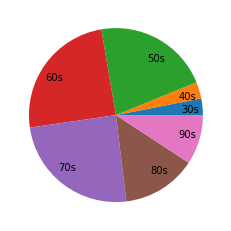

In [14]:
plt.pie(grp_ages['count'], labels=grp_ages['age_range'], labeldistance=.75)